In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.8 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=a58314cacad2b7142890668f19e511e12c1b540db1af497d7186e020e6a8c125
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [4]:
import ppscore as pps

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/dga_2class.csv')

In [20]:
df.head()

,length,entropy,alexa_grams,word_grams,diff,class
0,16,3.625000,52.034859,66.248388,-14.213529,legit
1,10,2.721928,26.081266,34.875759,-8.794493,legit
2,18,3.503258,73.639321,49.178071,24.461250,legit
3,10,2.921928,37.811207,31.080095,6.731113,legit
4,14,3.378783,57.128299,62.396567,-5.268268,legit


In [22]:
df.drop(df.columns[5], axis=1, inplace=True)

In [23]:
df.head()

,length,entropy,alexa_grams,word_grams,diff
0,16,3.625000,52.034859,66.248388,-14.213529
1,10,2.721928,26.081266,34.875759,-8.794493
2,18,3.503258,73.639321,49.178071,24.461250
3,10,2.921928,37.811207,31.080095,6.731113
4,14,3.378783,57.128299,62.396567,-5.268268


In [32]:
# Get the pps values
plt.figure(figsize=(16,12))
c=pps.matrix(df)
c

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,length,length,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,length,entropy,0.469286,regression,True,mean absolute error,0.349323,0.185391,DecisionTreeRegressor()
2,length,alexa_grams,0.513996,regression,True,mean absolute error,19.758667,9.602801,DecisionTreeRegressor()
3,length,word_grams,0.497470,regression,True,mean absolute error,25.948032,13.039662,DecisionTreeRegressor()
4,length,diff,0.185177,regression,True,mean absolute error,8.681676,7.074026,DecisionTreeRegressor()
5,entropy,length,0.865445,regression,True,mean absolute error,4.017000,0.540507,DecisionTreeRegressor()
6,entropy,entropy,1.000000,predict_itself,True,None,0.000000,1.000000,None
7,entropy,alexa_grams,0.429895,regression,True,mean absolute error,19.758667,11.264524,DecisionTreeRegressor()
8,entropy,word_grams,0.419436,regression,True,mean absolute error,25.948032,15.064488,DecisionTreeRegressor()
9,entropy,diff,0.116965,regression,True,mean absolute error,8.681676,7.666227,DecisionTreeRegressor()


<Figure size 1600x1200 with 0 Axes>

<Axes: xlabel='x', ylabel='y'>

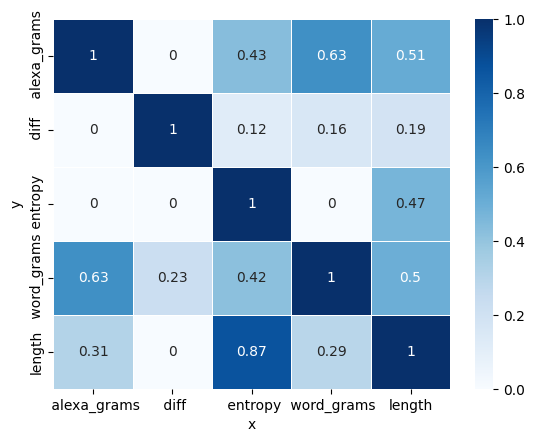

In [37]:
# plot pps values and columns
df = c[["x", "y", "ppscore"]].pivot(columns="x", index="y", values="ppscore")
sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

 Από τα αποτελέσματα του πίνακα pps βλεπουμε ότι καποιες στήλες έχουν παρόμοια προβλεπτική ικανοτητα καθως είναι correlated. Για παράδειγμα alexa_grams και word_grams είναι αρκετα correlated και ετσι μπορούμε να αφαιρέσουμε μια απο τις δύο στήλες. Επισης το length και το entropy εχουν τιμη κοντα στο 1 που μας δείχνει ότι είναι ππαρόμοιεσ και μπορούμε να κρατήσουμε την μια απο τις 2.

<Axes: >

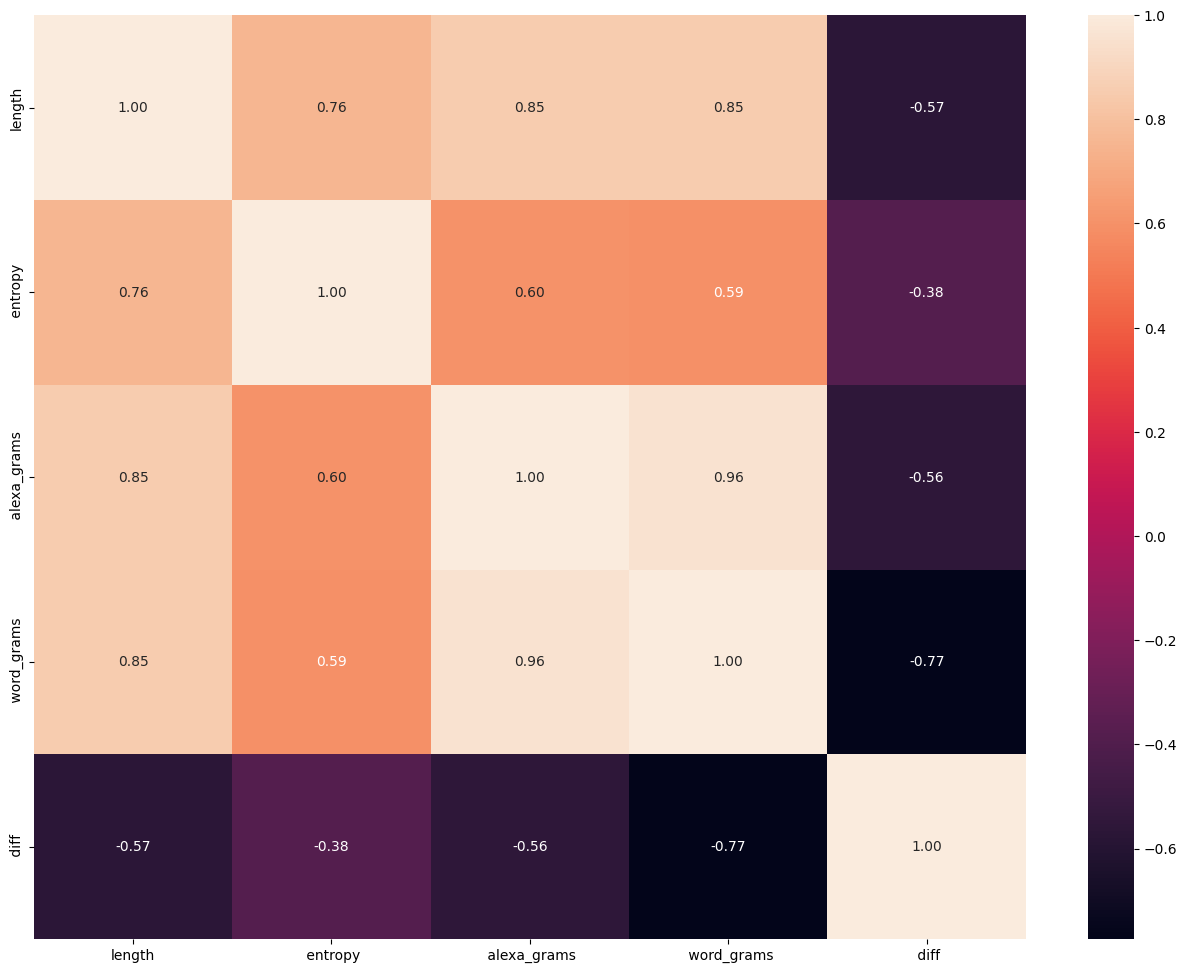

In [27]:
# plot correlation values
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,fmt=".2f")